In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Flatten



In [88]:
df = pd.read_csv('C:/Users/ASUS/Documents/Covid_19_time_series_research-main/brazil.csv')
df=df.loc[(df['total_cases'] > 0)]

In [89]:
new_df = df.loc[:, df.columns.intersection(['date','new_cases'])]

In [90]:
new_df

,date,new_cases
57,2020-02-26,1.0
58,2020-02-27,0.0
59,2020-02-28,0.0
60,2020-02-29,0.0
61,2020-03-01,1.0
...,...,...
279,2020-10-05,8456.0
280,2020-10-06,11946.0
281,2020-10-07,41906.0
282,2020-10-08,31553.0


In [115]:
days = np.arange(1,228)
newCases = pd.DataFrame(new_df['new_cases']).to_numpy()
newCases = newCases.reshape(-1) 
newCases.shape

(227,)

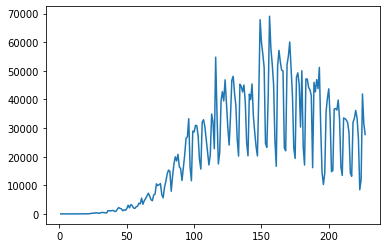

In [116]:
plt.plot(days,newCases)

In [117]:
def prepare_data(timeseries_data, n_steps):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        print(i,end_ix)
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [118]:
# define input sequence
timeseries_data = list(newCases[0:200])
# choose a number of time steps
n_steps = 10
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

0 10
1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19
10 20
11 21
12 22
13 23
14 24
15 25
16 26
17 27
18 28
19 29
20 30
21 31
22 32
23 33
24 34
25 35
26 36
27 37
28 38
29 39
30 40
31 41
32 42
33 43
34 44
35 45
36 46
37 47
38 48
39 49
40 50
41 51
42 52
43 53
44 54
45 55
46 56
47 57
48 58
49 59
50 60
51 61
52 62
53 63
54 64
55 65
56 66
57 67
58 68
59 69
60 70
61 71
62 72
63 73
64 74
65 75
66 76
67 77
68 78
69 79
70 80
71 81
72 82
73 83
74 84
75 85
76 86
77 87
78 88
79 89
80 90
81 91
82 92
83 93
84 94
85 95
86 96
87 97
88 98
89 99
90 100
91 101
92 102
93 103
94 104
95 105
96 106
97 107
98 108
99 109
100 110
101 111
102 112
103 113
104 114
105 115
106 116
107 117
108 118
109 119
110 120
111 121
112 122
113 123
114 124
115 125
116 126
117 127
118 128
119 129
120 130
121 131
122 132
123 133
124 134
125 135
126 136
127 137
128 138
129 139
130 140
131 141
132 142
133 143
134 144
135 145
136 146
137 147
138 148
139 149
140 150
141 151
142 152
143 153
144 154
145 155
146 156
147 157
148 158
149 159


In [119]:
X.shape

(190, 10)

In [130]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [134]:
model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=400, verbose=1)

Train on 190 samples
Epoch 1/400
190/190 [==============================] - 6s 29ms/sample - loss: 885827295.6632
Epoch 2/400
190/190 [==============================] - 0s 357us/sample - loss: 883703338.4421
Epoch 3/400
190/190 [==============================] - 0s 354us/sample - loss: 880985508.3789
Epoch 4/400
190/190 [==============================] - 0s 576us/sample - loss: 871586409.0947
Epoch 5/400
190/190 [==============================] - 0s 569us/sample - loss: 866222679.5789
Epoch 6/400
190/190 [==============================] - 0s 573us/sample - loss: 860610052.0421
Epoch 7/400
190/190 [==============================] - 0s 621us/sample - loss: 829910984.7579
Epoch 8/400
190/190 [==============================] - 0s 459us/sample - loss: 826597444.0421
Epoch 9/400
190/190 [==============================] - 0s 481us/sample - loss: 811304905.4316
Epoch 10/400
190/190 [==============================] - 0s 586us/sample - loss: 794803371.7895
Epoch 11/400
190/190 [=================

Epoch 79/400
190/190 [==============================] - 0s 326us/sample - loss: 3097937281.3474
Epoch 80/400
190/190 [==============================] - 0s 551us/sample - loss: 311569770.2737
Epoch 81/400
190/190 [==============================] - 0s 585us/sample - loss: 486104600.9263
Epoch 82/400
190/190 [==============================] - 0s 598us/sample - loss: 800313736.7579
Epoch 83/400
190/190 [==============================] - 0s 510us/sample - loss: 721084124.2947
Epoch 84/400
190/190 [==============================] - 0s 535us/sample - loss: 584602318.8211
Epoch 85/400
190/190 [==============================] - 0s 603us/sample - loss: 2230684359.4105
Epoch 86/400
190/190 [==============================] - 0s 560us/sample - loss: 2243912236.4632
Epoch 87/400
190/190 [==============================] - 0s 517us/sample - loss: 1459889899.7895
Epoch 88/400
190/190 [==============================] - 0s 600us/sample - loss: 695515811.0316
Epoch 89/400
190/190 [========================

190/190 [==============================] - 0s 549us/sample - loss: 119590185.9368
Epoch 165/400
190/190 [==============================] - 0s 556us/sample - loss: 144187735.0737
Epoch 166/400
190/190 [==============================] - 0s 606us/sample - loss: 134059296.8421
Epoch 167/400
190/190 [==============================] - 0s 552us/sample - loss: 139037780.5474
Epoch 168/400
190/190 [==============================] - 0s 573us/sample - loss: 158517721.0947
Epoch 169/400
190/190 [==============================] - 0s 579us/sample - loss: 157049614.8211
Epoch 170/400
190/190 [==============================] - 0s 569us/sample - loss: 162908122.2737
Epoch 171/400
190/190 [==============================] - 0s 554us/sample - loss: 144025360.9684
Epoch 172/400
190/190 [==============================] - 0s 583us/sample - loss: 120321705.6000
Epoch 173/400
190/190 [==============================] - 0s 578us/sample - loss: 102868907.9579
Epoch 174/400
190/190 [==============================]

190/190 [==============================] - 0s 506us/sample - loss: 111506709.0526
Epoch 250/400
190/190 [==============================] - 0s 596us/sample - loss: 124406399.4947
Epoch 251/400
190/190 [==============================] - 0s 571us/sample - loss: 136981005.1368
Epoch 252/400
190/190 [==============================] - 0s 556us/sample - loss: 127545540.2105
Epoch 253/400
190/190 [==============================] - 0s 570us/sample - loss: 137023275.7895
Epoch 254/400
190/190 [==============================] - 0s 570us/sample - loss: 145447490.6947
Epoch 255/400
190/190 [==============================] - 0s 551us/sample - loss: 149766265.6000
Epoch 256/400
190/190 [==============================] - 0s 558us/sample - loss: 155742623.1579
Epoch 257/400
190/190 [==============================] - 0s 587us/sample - loss: 144396618.4842
Epoch 258/400
190/190 [==============================] - 0s 569us/sample - loss: 138251091.0316
Epoch 259/400
190/190 [==============================]

190/190 [==============================] - 0s 570us/sample - loss: 92800702.8211
Epoch 336/400
190/190 [==============================] - 0s 570us/sample - loss: 85828235.0316
Epoch 337/400
190/190 [==============================] - 0s 529us/sample - loss: 85784158.5684
Epoch 338/400
190/190 [==============================] - 0s 525us/sample - loss: 86066968.7579
Epoch 339/400
190/190 [==============================] - 0s 574us/sample - loss: 82020043.9579
Epoch 340/400
190/190 [==============================] - 0s 574us/sample - loss: 84397999.1579
Epoch 341/400
190/190 [==============================] - 0s 583us/sample - loss: 84728705.7684 - loss: 100972233.000
Epoch 342/400
190/190 [==============================] - 0s 577us/sample - loss: 84101678.3158
Epoch 343/400
190/190 [==============================] - 0s 570us/sample - loss: 80931734.1474
Epoch 344/400
190/190 [==============================] - 0s 563us/sample - loss: 83172546.8211
Epoch 345/400
190/190 [===================

In [136]:
# demonstrate prediction for next 30 days
x_input = newCases[185:195]
temp_input=list(x_input)
lst_output=[]
i=0
print(len(temp_input))
while(i<30):
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

10
[46009.113]
1 day input [41350.         16158.         45961.         42659.
 46934.         43773.         51194.         30168.
 14521.         46009.11328125]
1 day output [[40053.008]]
2 day input [16158.         45961.         42659.         46934.
 43773.         51194.         30168.         14521.
 46009.11328125 40053.0078125 ]
2 day output [[39603.78]]
3 day input [45961.         42659.         46934.         43773.
 51194.         30168.         14521.         46009.11328125
 40053.0078125  39603.78125   ]
3 day output [[36753.023]]
4 day input [42659.         46934.         43773.         51194.
 30168.         14521.         46009.11328125 40053.0078125
 39603.78125    36753.0234375 ]
4 day output [[40443.33]]
5 day input [46934.         43773.         51194.         30168.
 14521.         46009.11328125 40053.0078125  39603.78125
 36753.0234375  40443.328125  ]
5 day output [[45286.312]]
6 day input [43773.         51194.         30168.         14521.
 46009.11328125 4

In [ ]:
timeseries_data

In [137]:
lst_output

[46009.113,
 40053.008,
 39603.78,
 36753.023,
 40443.33,
 45286.312,
 28679.49,
 49983.676,
 41944.25,
 37318.633,
 37020.58,
 41587.703,
 38483.223,
 34649.99,
 41879.18,
 40126.99,
 33569.492,
 48478.195,
 43249.28,
 40162.684,
 31942.127,
 29790.29,
 52004.457,
 32111.002,
 36346.812,
 43447.535,
 36221.816,
 37854.945,
 43979.77,
 29999.863]

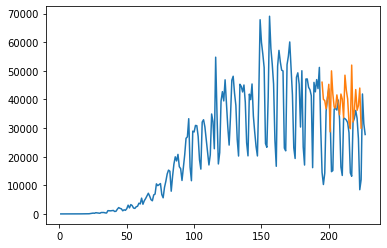

In [138]:
day_pred=np.arange(195,225)
plt.plot(days,newCases)
plt.plot(day_pred,lst_output)